# Data Preparation and Cleaning

In [3]:
import pandas as pd
import numpy as np

In [4]:
energy_record_df = pd.read_csv('./per-capita-energy-use.csv')
energy_record_df

,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350
...,...,...,...,...
8956,Zimbabwe,ZWE,2012,4251.321680
8957,Zimbabwe,ZWE,2013,4200.828880
8958,Zimbabwe,ZWE,2014,4127.800993
8959,Zimbabwe,ZWE,2015,4027.628101


In [5]:
energy_record_df['Energy_consumption_per_capita'] = energy_record_df['Energy consumption per capita (kWh)']
energy_record_df.drop('Energy consumption per capita (kWh)', axis='columns', inplace=True)

In [6]:
energy_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Entity                         8961 non-null   object 
 1   Code                           8796 non-null   object 
 2   Year                           8961 non-null   int64  
 3   Energy_consumption_per_capita  8961 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 210.1+ KB


In [7]:
energy_record_df.shape

(8961, 4)

In [8]:
energy_record_df.columns

Index(['Entity', 'Code', 'Year', 'Energy_consumption_per_capita'], dtype='object')

In [9]:
energy_record_df.isnull().sum()

Entity                             0
Code                             165
Year                               0
Energy_consumption_per_capita      0
dtype: int64

In [10]:
energy_record_df.describe()

,Year,Energy_consumption_per_capita
count,8961.000000,8.961000e+03
mean,1995.877581,2.983376e+04
std,13.544539,7.549302e+04
min,1965.000000,0.000000e+00
25%,1986.000000,3.249927e+03
50%,1997.000000,1.407556e+04
75%,2007.000000,3.695648e+04
max,2019.000000,1.676610e+06


In [11]:
energy_record_df.head(5)

,Entity,Code,Year,Energy_consumption_per_capita
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


In [12]:
energy_record_df.drop('Code', axis='columns', inplace=True)

In [13]:
energy_record_df

,Entity,Year,Energy_consumption_per_capita
0,Afghanistan,1980,581.932201
1,Afghanistan,1981,662.912777
2,Afghanistan,1982,709.075252
3,Afghanistan,1983,877.845852
4,Afghanistan,1984,905.948350
...,...,...,...
8956,Zimbabwe,2012,4251.321680
8957,Zimbabwe,2013,4200.828880
8958,Zimbabwe,2014,4127.800993
8959,Zimbabwe,2015,4027.628101


In [14]:
countries_df = pd.read_csv('./countries.csv')
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


In [15]:
countries_df['Entity'] = countries_df['location']
countries_df = countries_df[['Entity','continent','population','gdp_per_capita']]
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          210 non-null    object 
 1   continent       210 non-null    object 
 2   population      210 non-null    float64
 3   gdp_per_capita  183 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


In [16]:
countries_df.isnull().sum()

Entity             0
continent          0
population         0
gdp_per_capita    27
dtype: int64

In [17]:
energy_record_df = energy_record_df.merge(countries_df, on="Entity")
energy_record_df

,Entity,Year,Energy_consumption_per_capita,continent,population,gdp_per_capita
0,Afghanistan,1980,581.932201,Asia,38928341.0,1803.987
1,Afghanistan,1981,662.912777,Asia,38928341.0,1803.987
2,Afghanistan,1982,709.075252,Asia,38928341.0,1803.987
3,Afghanistan,1983,877.845852,Asia,38928341.0,1803.987
4,Afghanistan,1984,905.948350,Asia,38928341.0,1803.987
...,...,...,...,...,...,...
8109,Zimbabwe,2012,4251.321680,Africa,14862927.0,1899.775
8110,Zimbabwe,2013,4200.828880,Africa,14862927.0,1899.775
8111,Zimbabwe,2014,4127.800993,Africa,14862927.0,1899.775
8112,Zimbabwe,2015,4027.628101,Africa,14862927.0,1899.775


In [18]:
energy_record_df.describe()

,Year,Energy_consumption_per_capita,population,gdp_per_capita
count,8114.000000,8.114000e+03,8.114000e+03,7504.000000
mean,1995.801454,3.041753e+04,4.805742e+07,21915.151284
std,13.642262,7.879369e+04,1.676820e+08,20924.739638
min,1965.000000,0.000000e+00,4.999000e+03,661.240000
25%,1986.000000,3.064305e+03,2.416664e+06,6171.884000
50%,1997.000000,1.379587e+04,9.904608e+06,15308.712000
75%,2007.000000,3.770673e+04,3.346920e+07,33132.320000
max,2019.000000,1.676610e+06,1.439324e+09,116935.600000


In [19]:
energy_record_df.sample(20)

,Entity,Year,Energy_consumption_per_capita,continent,population,gdp_per_capita
5570,Panama,2001,21961.620402,North America,4314768.0,22267.037
4814,Moldova,2003,8787.237427,Europe,4033963.0,5189.972
1987,Denmark,1971,46277.919708,Europe,5792203.0,46682.515
6103,Rwanda,2016,425.289535,Africa,12952209.0,1854.211
6391,Seychelles,2002,41976.464980,Africa,98340.0,26382.287
415,Austria,2011,45537.712612,Europe,9006400.0,45436.686
7713,United States,1986,83534.477279,North America,331002647.0,54225.446
4733,Mauritius,2002,13332.902683,Africa,1271767.0,20292.745
1606,Colombia,1970,5572.816389,South America,50882884.0,13254.949
4523,Malaysia,1980,9233.680645,Asia,32365998.0,26808.164


# Exploratory Analysis and Visualization

In [20]:
#Let's begin by importingmatplotlib.pyplot and seaborn

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Matplotlib is building the font cache; this may take a moment.


#### Energy consumption per capita

In [23]:
#This bar chart represent Energy consumption per capita(kW/h)

<AxesSubplot:title={'center':'Energy consumption per capita'}, xlabel='Entity', ylabel='Energy_consumption_per_capita'>

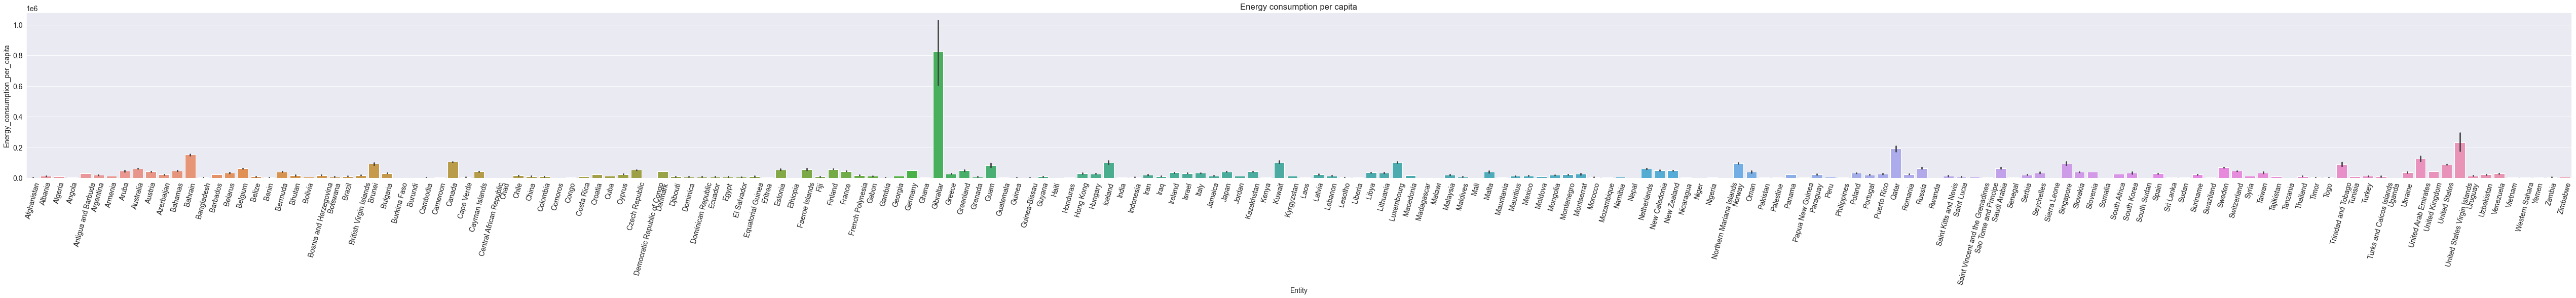

In [25]:
plt.figure(figsize=(90,6))
plt.title('Energy consumption per capita')
plt.xticks(rotation=75)
sns.barplot(x=energy_record_df.Entity, y=energy_record_df.Energy_consumption_per_capita)

### Energy consumption per capita in each year from all countries

<AxesSubplot:title={'center':'Energy consumption per capita in each year'}, xlabel='Year', ylabel='Energy_consumption_per_capita'>

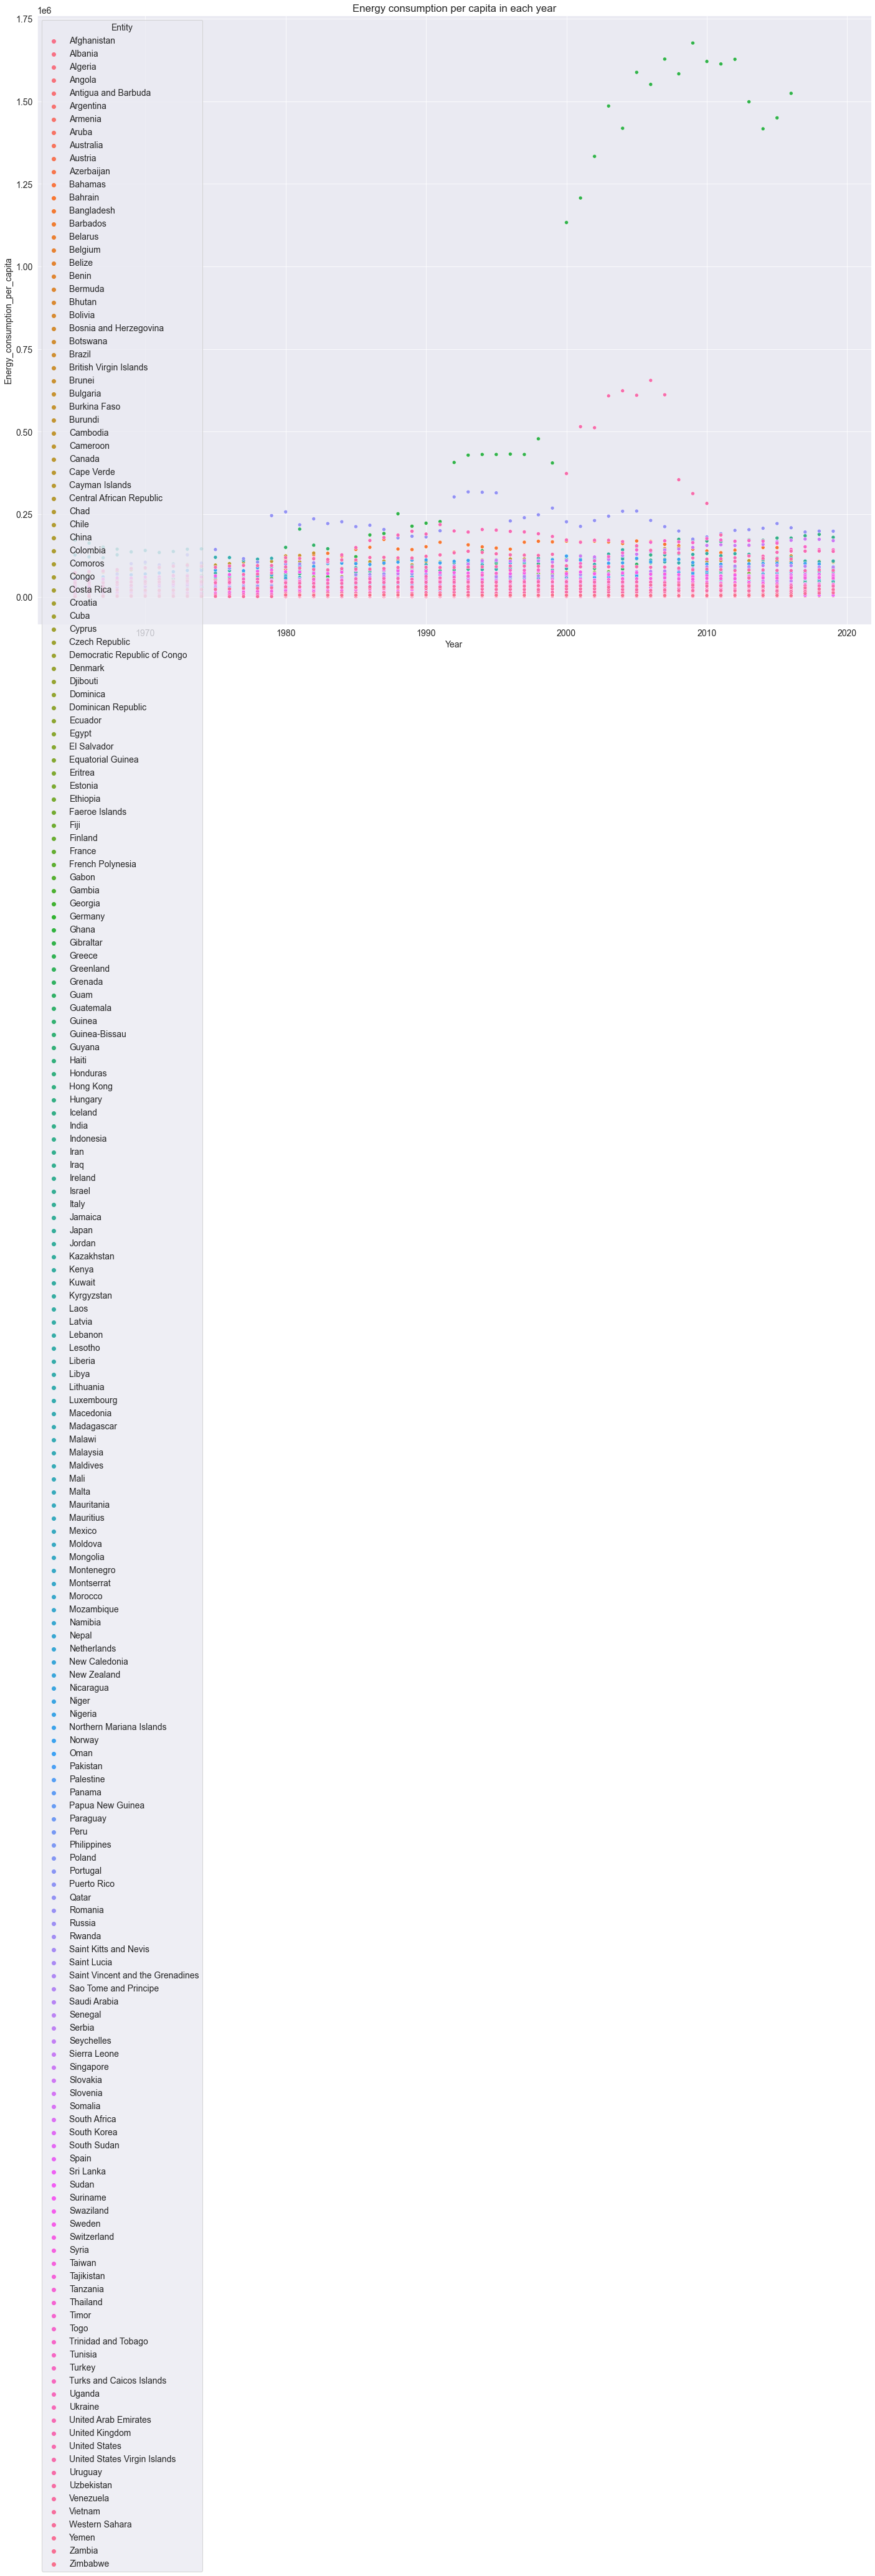

In [26]:
plt.figure(figsize=(24,18))
plt.title('Energy consumption per capita in each year')
sns.scatterplot(x=energy_record_df.Year, y=energy_record_df.Energy_consumption_per_capita, hue=energy_record_df.Entity)

### Top 20 highest energy consumption per capita countries

In [29]:
by_countries_df = energy_record_df.groupby('Entity')['Energy_consumption_per_capita'].mean().sort_values(ascending=False).head(20)

<AxesSubplot:title={'center':'Top 20 highest energy consumption per capita'}, xlabel='Entity', ylabel='Energy_consumption_per_capita'>

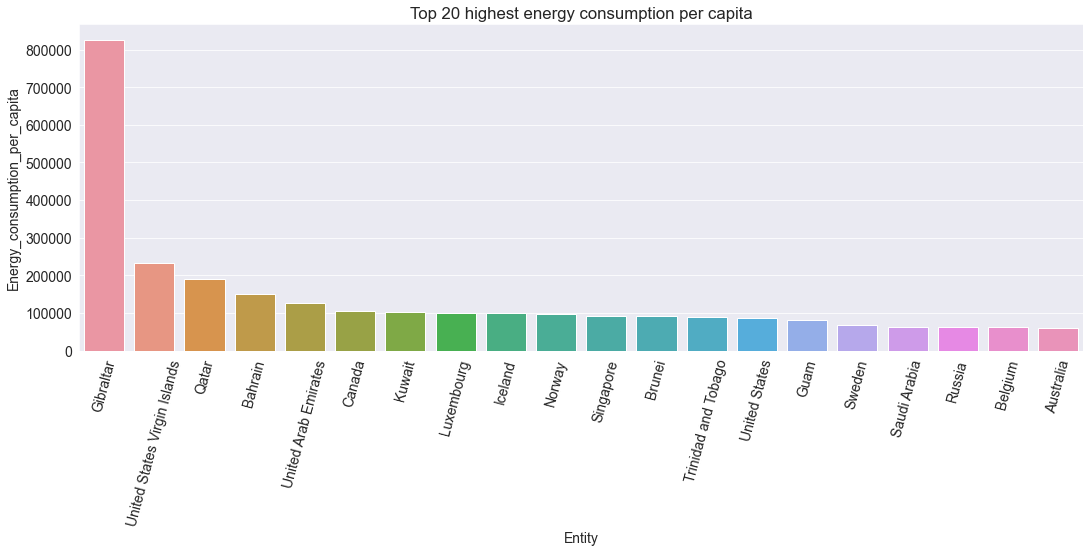

In [31]:
plt.figure(figsize=(18,6))
plt.title('Top 20 highest energy consumption per capita')
plt.xticks(rotation=75)
sns.barplot(x=by_countries_df.index, y=by_countries_df)

### Energy usage per capita in each year

In [32]:
by_year_df = energy_record_df.groupby('Year')['Energy_consumption_per_capita'].sum()

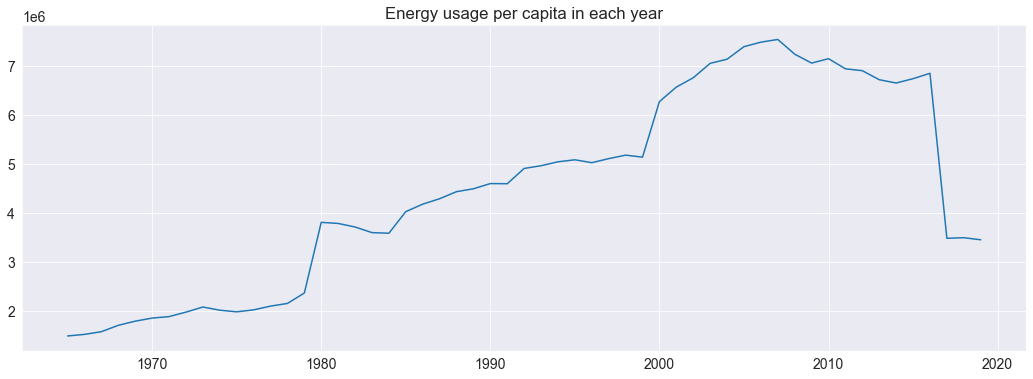

In [33]:
plt.figure(figsize=(18,6))
plt.title('Energy usage per capita in each year')
plt.plot(by_year_df.index, by_year_df);

### Total global energy consumption in each year

In [34]:
energy_record_df['Energy_comsumption'] = energy_record_df['Energy_consumption_per_capita']*energy_record_df['population']

In [35]:
year_energy_df = energy_record_df.groupby('Year')['Energy_comsumption'].sum()

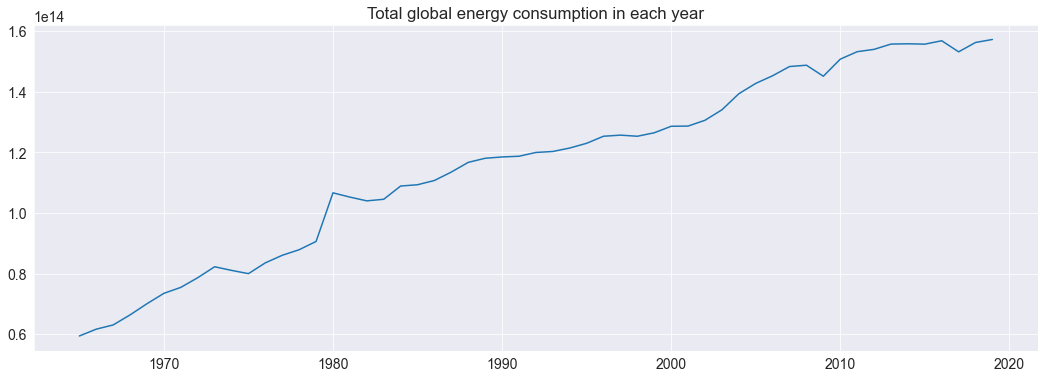

In [36]:
plt.figure(figsize=(18,6))
plt.title('Total global energy consumption in each year')
plt.plot(year_energy_df.index, year_energy_df);

# Asking and Answering Questions

### Q: What year global energy consumption is at the peak and what country consumed the most?

In [38]:
peak_record = year_energy_df.sort_values(ascending=False).head(1)
peak_year = peak_record.index[0]

In [40]:
peak_consume_country = energy_record_df[energy_record_df.Year == int(peak_year)].sort_values('Energy_comsumption', ascending=None)
peak_consume_country

,Entity,Year,Energy_consumption_per_capita,continent,population,gdp_per_capita,Energy_comsumption
1600,China,2019,27452.477933,Asia,1.439324e+09,15308.712,3.951300e+13
7746,United States,2019,79897.151407,North America,3.310026e+08,54225.446,2.644617e+13
3482,India,2019,6923.930653,Asia,1.380004e+09,6426.674,9.555055e+12
6066,Russia,2019,56756.465798,Europe,1.459345e+08,24765.954,8.282724e+12
3904,Japan,2019,40888.804345,Asia,1.264765e+08,39002.223,5.171471e+12
...,...,...,...,...,...,...,...
3427,Iceland,2019,179962.795560,Europe,3.412500e+05,46482.958,6.141230e+10
4403,Luxembourg,2019,76658.118235,Europe,6.259760e+05,94277.965,4.798614e+10
4165,Latvia,2019,23136.924645,Europe,1.886202e+06,25063.846,4.364091e+10
4433,Macedonia,2019,14919.495853,Europe,2.083380e+06,13111.214,3.108298e+10


<AxesSubplot:title={'center':'Top energy consumption in 2019'}, xlabel='Energy_comsumption', ylabel='Entity'>

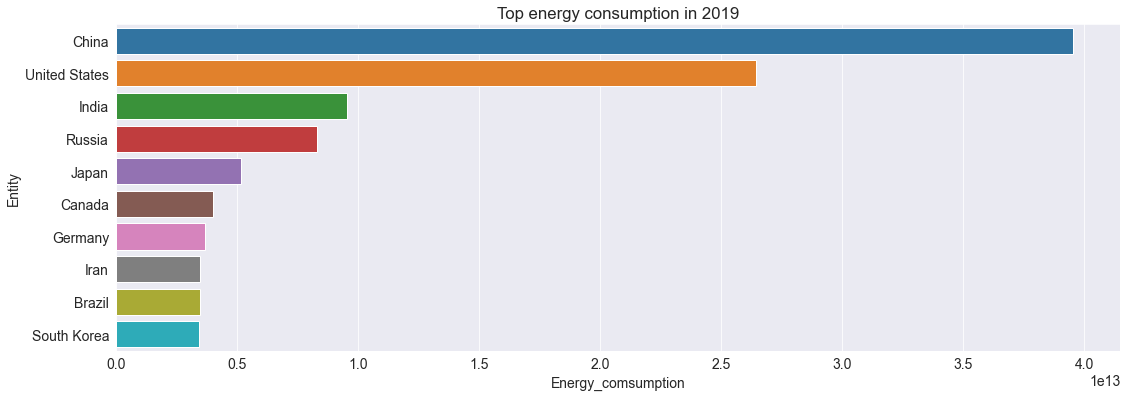

In [41]:
plt.figure(figsize=(18,6))
plt.title('Top energy consumption in {}'.format(peak_year))
sns.barplot(x=peak_consume_country.Energy_comsumption.head(10), y=peak_consume_country.Entity.head(10))

In [42]:
print('The year that peak is {}. In this year {} is the country that consume the most.'.format(peak_year, peak_consume_country.head(1).Entity.index[0]))

The year that peak is 2019. In this year 1600 is the country that consume the most.


### Q: What country in the world have the highest gdp but have lowest energy consumption per capita ratio

In [43]:
energy_record_df['gdp_ec_ratio'] = energy_record_df['gdp_per_capita']/energy_record_df['Energy_consumption_per_capita']


In [44]:
gdp_ec_ratio = energy_record_df.groupby('Entity')['gdp_ec_ratio'].mean().sort_values(ascending=False).head(15)

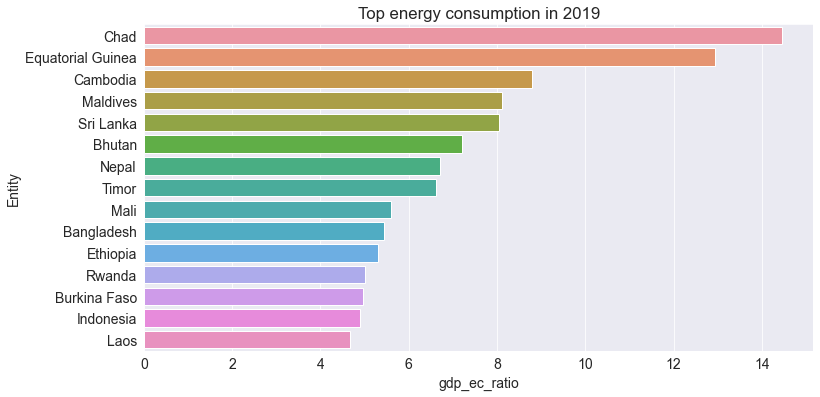

In [45]:
plt.figure(figsize=(12,6))
plt.title('Top energy consumption in {}'.format(peak_year))
sns.barplot(x=gdp_ec_ratio, y=gdp_ec_ratio.index);

### Q: What continent have the highest energy consumption per capita

In [46]:
continent_cons = peak_consume_country.groupby('continent').sum()

In [47]:
continent_cons

,Year,Energy_consumption_per_capita,population,gdp_per_capita,Energy_comsumption
continent,,,,,
Africa,8076,5.997678e+04,2.424047e+08,44243.934,3.604771e+12
Asia,54513,1.325533e+06,4.360400e+09,802469.824,8.269226e+13
Europe,68646,1.477212e+06,7.279816e+08,1238809.877,2.951877e+13
North America,8076,3.443666e+05,4.990770e+08,144342.577,3.279583e+13
Oceania,4038,1.238687e+05,3.032211e+07,80734.553,2.058076e+12
South America,14133,1.162080e+05,4.068051e+08,108623.009,6.599052e+12


In [48]:
continent_cons['continent_ec_per_capita'] = continent_cons['Energy_comsumption']/continent_cons['population'].sort_values(ascending=False)

In [51]:
continent_ec_per_capita = (continent_cons['Energy_comsumption']/continent_cons['population']).sort_values(ascending=False)

<AxesSubplot:title={'center':'Continent consumption per capita'}, ylabel='continent'>

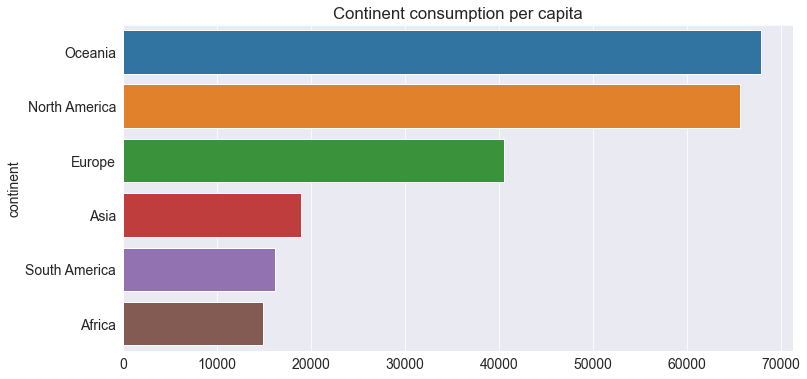

In [52]:
plt.figure(figsize=(12,6))
plt.title('Continent consumption per capita')
sns.barplot(x=continent_ec_per_capita, y=continent_ec_per_capita.index)

([<matplotlib.patches.Wedge at 0x1575a388>,
 [Text(-0.6388574589460304, -0.895466999475146, 'Oceania'),
  Text(1.0446627680340563, -0.3444992033131915, 'North America'),
  Text(0.4286629042854114, 1.0130390488473762, 'Europe'),
  Text(-0.4622092447541956, 0.9981796501951722, 'Asia'),
  Text(-0.8796164728464092, 0.6605110602383902, 'South America'),
  Text(-1.0762030591958662, 0.22756751828294616, 'Africa')],
 [Text(-0.34846770487965295, -0.4884365451682614, '30.3%'),
  Text(0.5698160552913033, -0.1879086563526499, '29.3%'),
  Text(0.23381612961022435, 0.5525667539167506, '18.1%'),
  Text(-0.2521141335022885, 0.5444616273791848, '8.5%'),
  Text(-0.4797908033707686, 0.36027876013003096, '7.2%'),
  Text(-0.5870198504704724, 0.12412773724524334, '6.6%')])

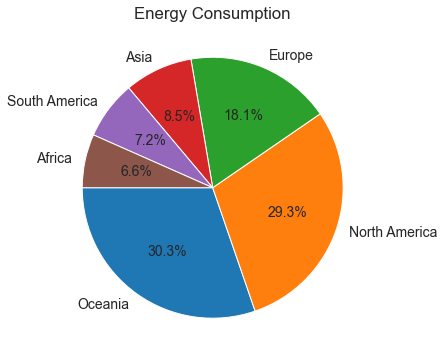

In [53]:
plt.figure(figsize=(6,6))
plt.title('Energy Consumption')
plt.pie(continent_ec_per_capita, labels=continent_ec_per_capita.index, autopct='%1.1f%%', startangle=180)

### Q: Why is energy consumption per capita drop around 2015 to 2020?

In [54]:
ec_drop = energy_record_df[energy_record_df.Year >= 2015].groupby('Year').count()['Entity']
ec_drop

Year
2015    194
2016    194
2017     78
2018     78
2019     78
Name: Entity, dtype: int64

Text(0.5, 1.0, 'Data Entry')

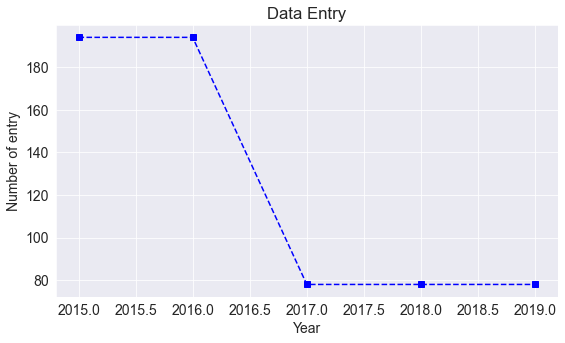

In [55]:
plt.plot(ec_drop.index, ec_drop, 's--b')
plt.xlabel('Year')
plt.ylabel('Number of entry')
plt.title('Data Entry')

In [ ]:
9657221943